In [148]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

In [149]:
# Read the dataset
dataSet  = pd.read_csv("DataSet/app-store-apple-data-set-10k-apps/AppleStore.csv")

np.random.seed(42)

# display complete text in columns
pd.set_option('display.max_colwidth', -1)
dataSet.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [150]:
#  Getting numercial columns to scale them
cleanedDataSet = dataSet.iloc[:, [3, 5, 6, 7, 8, 9, 13, 14, 15 ]]

In [151]:
# Scaled dataset
scaler = preprocessing.MinMaxScaler()
cleanedDataSet[cleanedDataSet.columns] = scaler.fit_transform(cleanedDataSet[cleanedDataSet.columns])
cleanedDataSet = pd.concat([cleanedDataSet, dataSet[['ver','id' ,'track_name', 'cont_rating','prime_genre']]] , axis=1)
cleanedDataSet.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,ver,id,track_name,cont_rating,prime_genre
0,0.024892,0.0133,0.007158,0.000147,0.8,0.9,0.763158,1.0,0.133333,6.3.5,281656475,PAC-MAN Premium,4+,Games
1,0.039248,0.0000,0.054145,0.000147,0.8,0.7,0.736842,1.0,0.306667,8.2.2,281796108,Evernote - stay organized,4+,Productivity
2,0.024826,0.0000,0.063396,0.015939,0.7,0.9,0.736842,1.0,0.040000,5.0.0,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",4+,Weather
3,0.031779,0.0000,0.088158,0.003666,0.8,0.9,0.736842,1.0,0.120000,5.10.0,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",12+,Shopping
4,0.022901,0.0000,0.331438,0.030048,0.9,1.0,0.736842,1.0,0.600000,7.5.1,282935706,Bible,4+,Reference


In [152]:
#  Check for null values
cleanedDataSet.isnull().sum() # there are no null values

# Check for column types
cleanedDataSet.dtypes

cleanedDataSet.info()

# Check the dataset shape
cleanedDataSet.shape

#  Drop the index and currency columns
# cleanedDataSet.drop(labels=['Unnamed: 0', 'currency'], axis=1, inplace=True)
cleanedDataSet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 14 columns):
size_bytes          7197 non-null float64
price               7197 non-null float64
rating_count_tot    7197 non-null float64
rating_count_ver    7197 non-null float64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
sup_devices.num     7197 non-null float64
ipadSc_urls.num     7197 non-null float64
lang.num            7197 non-null float64
ver                 7197 non-null object
id                  7197 non-null int64
track_name          7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 787.2+ KB


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,ver,id,track_name,cont_rating,prime_genre
0,0.024892,0.0133,0.007158,0.000147,0.8,0.9,0.763158,1.0,0.133333,6.3.5,281656475,PAC-MAN Premium,4+,Games
1,0.039248,0.0000,0.054145,0.000147,0.8,0.7,0.736842,1.0,0.306667,8.2.2,281796108,Evernote - stay organized,4+,Productivity
2,0.024826,0.0000,0.063396,0.015939,0.7,0.9,0.736842,1.0,0.040000,5.0.0,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",4+,Weather
3,0.031779,0.0000,0.088158,0.003666,0.8,0.9,0.736842,1.0,0.120000,5.10.0,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",12+,Shopping
4,0.022901,0.0000,0.331438,0.030048,0.9,1.0,0.736842,1.0,0.600000,7.5.1,282935706,Bible,4+,Reference


### Split the dataset into Games and Others

In [153]:
gamesDataSet = cleanedDataSet[cleanedDataSet['prime_genre'] == 'Games']
nonGamesDataSet = cleanedDataSet[cleanedDataSet['prime_genre'] != 'Games']

nonGamesDataSet.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,ver,id,track_name,cont_rating,prime_genre
1,0.039248,0.0,0.054145,0.000147,0.8,0.7,0.736842,1.0,0.306667,8.2.2,281796108,Evernote - stay organized,4+,Productivity
2,0.024826,0.0,0.063396,0.015939,0.7,0.9,0.736842,1.0,0.040000,5.0.0,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",4+,Weather
3,0.031779,0.0,0.088158,0.003666,0.8,0.9,0.736842,1.0,0.120000,5.10.0,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",12+,Shopping
4,0.022901,0.0,0.331438,0.030048,0.9,1.0,0.736842,1.0,0.600000,7.5.1,282935706,Bible,4+,Reference
6,0.056443,0.0,0.040168,0.004965,0.8,0.9,0.736842,0.0,0.253333,6.12.0,283646709,PayPal - Send and request money safely,4+,Finance


In [154]:
nonGamesDataSet['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

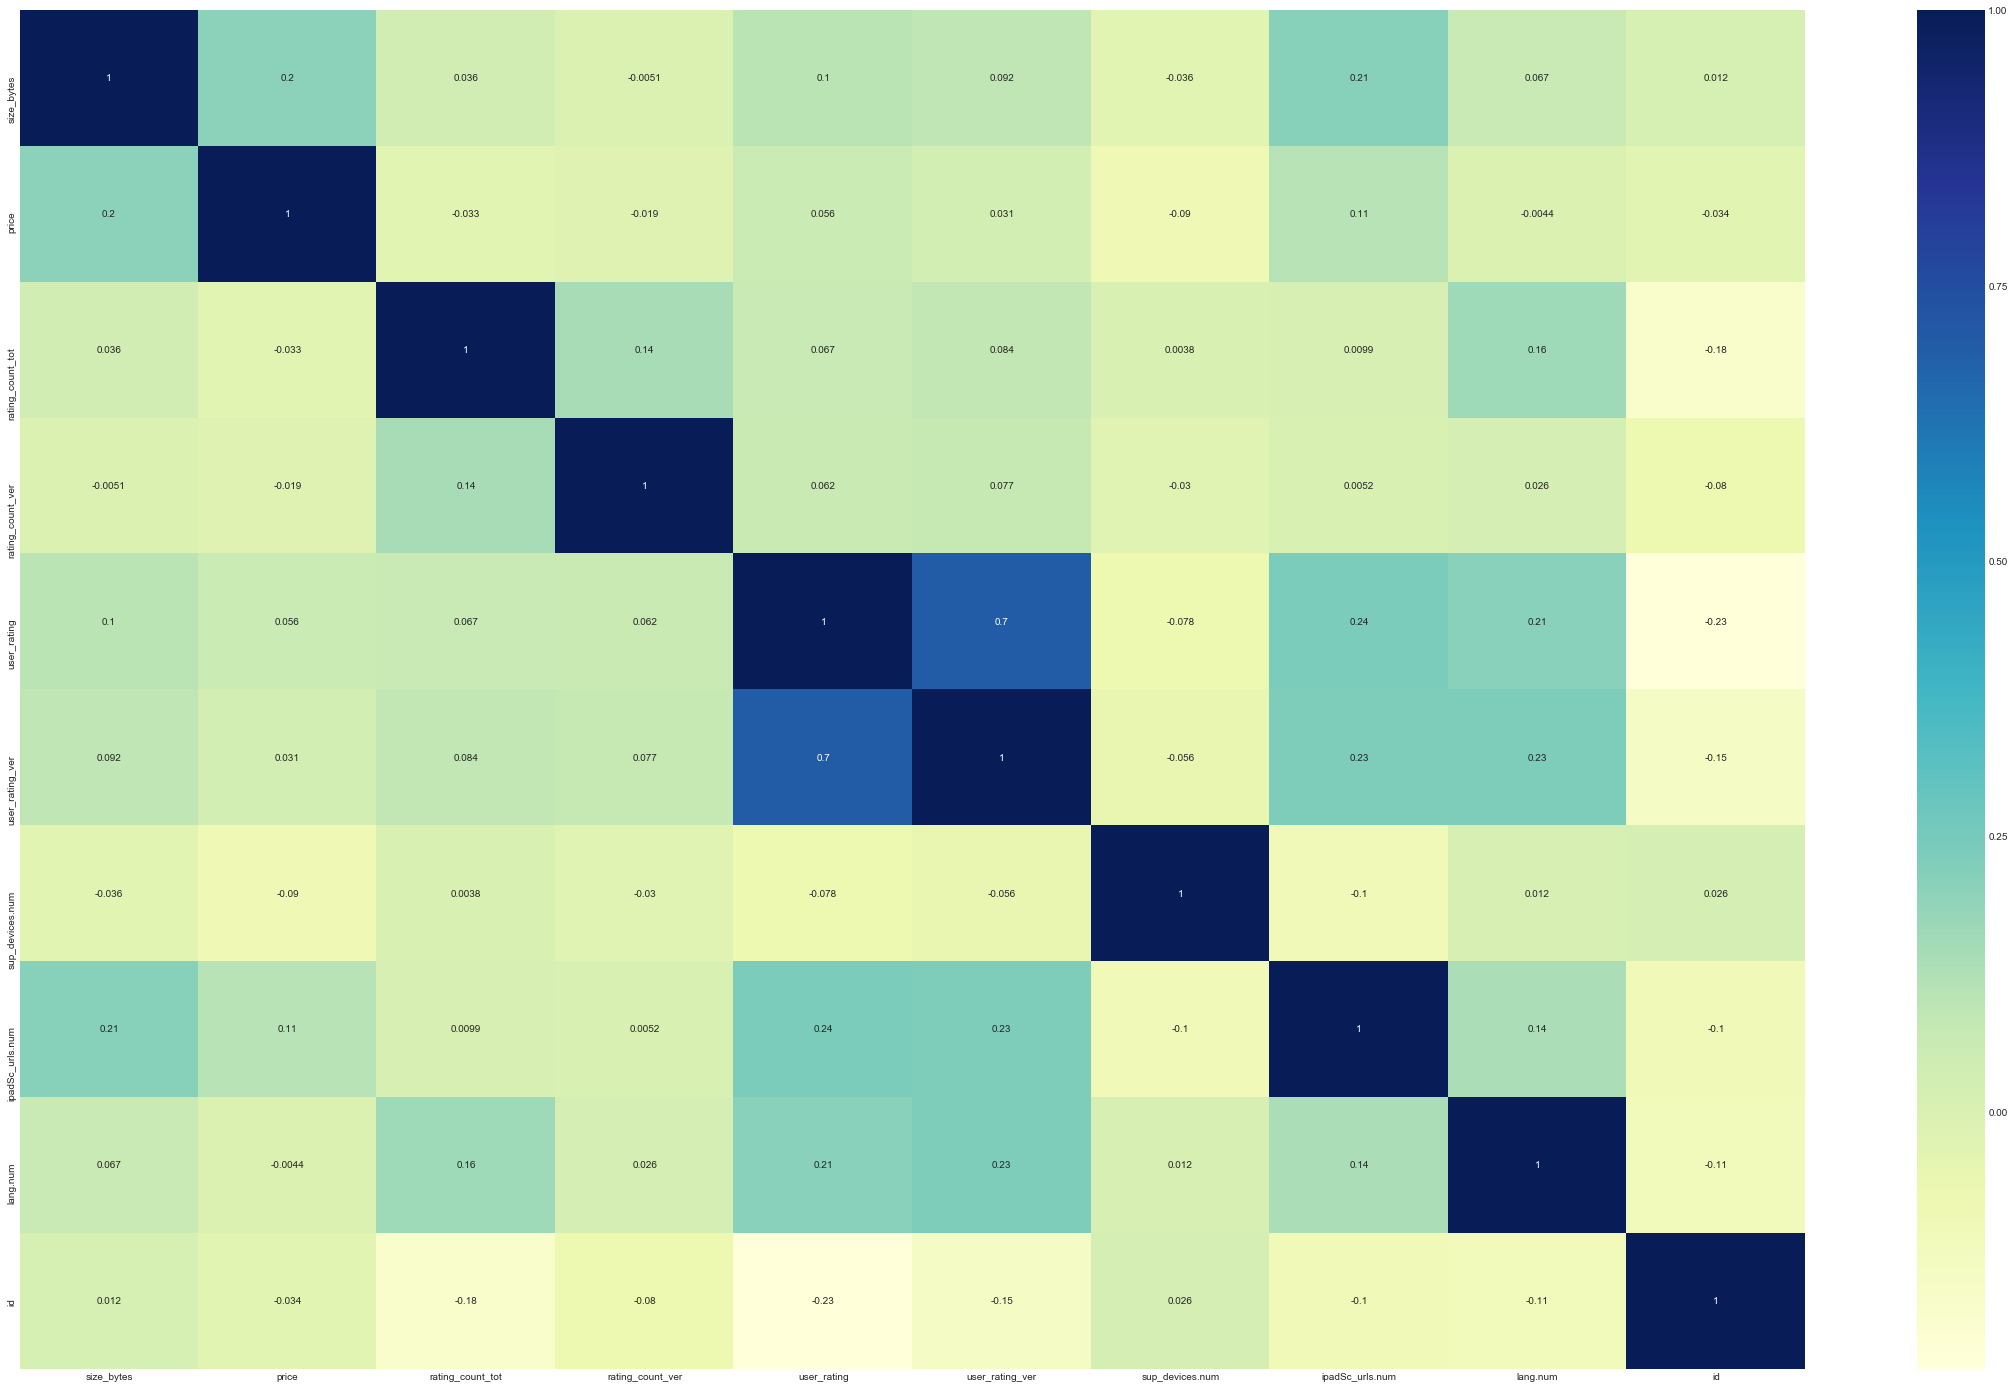

In [155]:
# Categorize the genres and add it to the original Dataframe
heatmapDataset = pd.concat([nonGamesDataSet, pd.get_dummies(nonGamesDataSet['prime_genre'], prefix_sep="genre", dummy_na=True)], axis = 1)
# nonGamesDataSet = pd.concat([nonGamesDataSet, pd.get_dummies(nonGamesDataSet['cont_rating'], prefix_sep="genre", dummy_na=False)], axis = 1)

#  Plotting the heatmap to find correlation
numericDataSet = nonGamesDataSet.drop(labels=['track_name'], axis=True)

fig, ax = plt.subplots(figsize=(40,25))

sns.heatmap(numericDataSet.corr(), annot=True, cmap='YlGnBu');

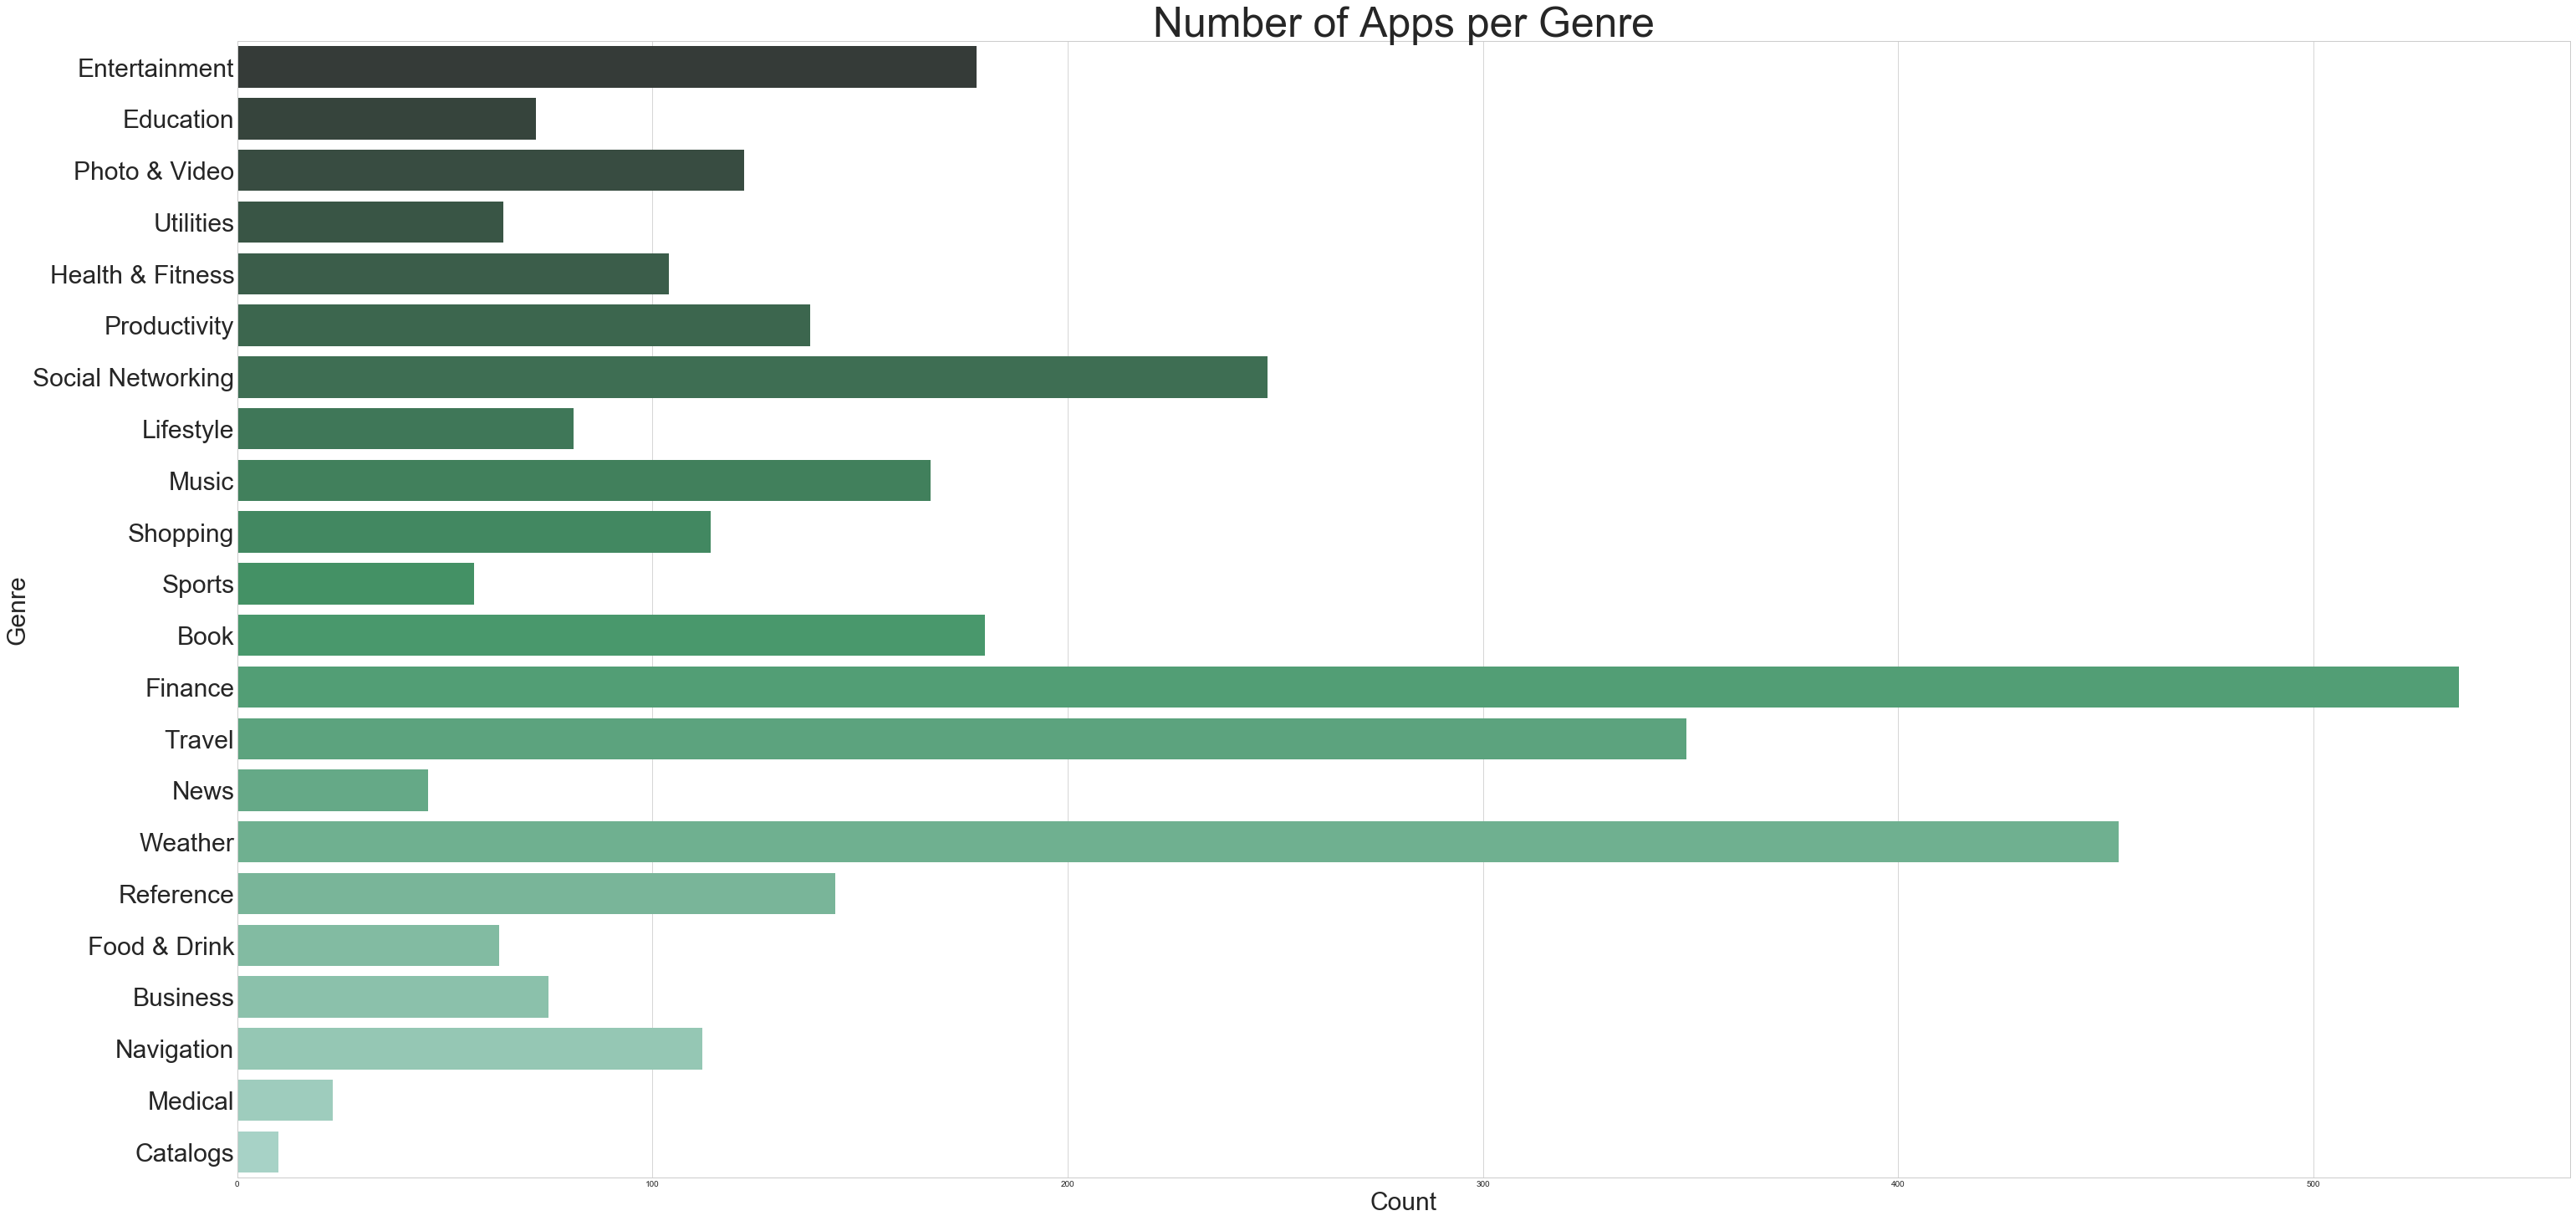

In [156]:
plt.figure(figsize=(50, 25));
g = sns.countplot(y='prime_genre',
            data=nonGamesDataSet,
            orient='h',palette="BuGn_d")
plt.title('Number of Apps per Genre', fontsize=50)
plt.xlabel('Count', fontsize=30);
plt.ylabel('Genre', fontsize=30);
g.set_yticklabels(labels=nonGamesDataSet['prime_genre'].value_counts().index, fontsize=30);

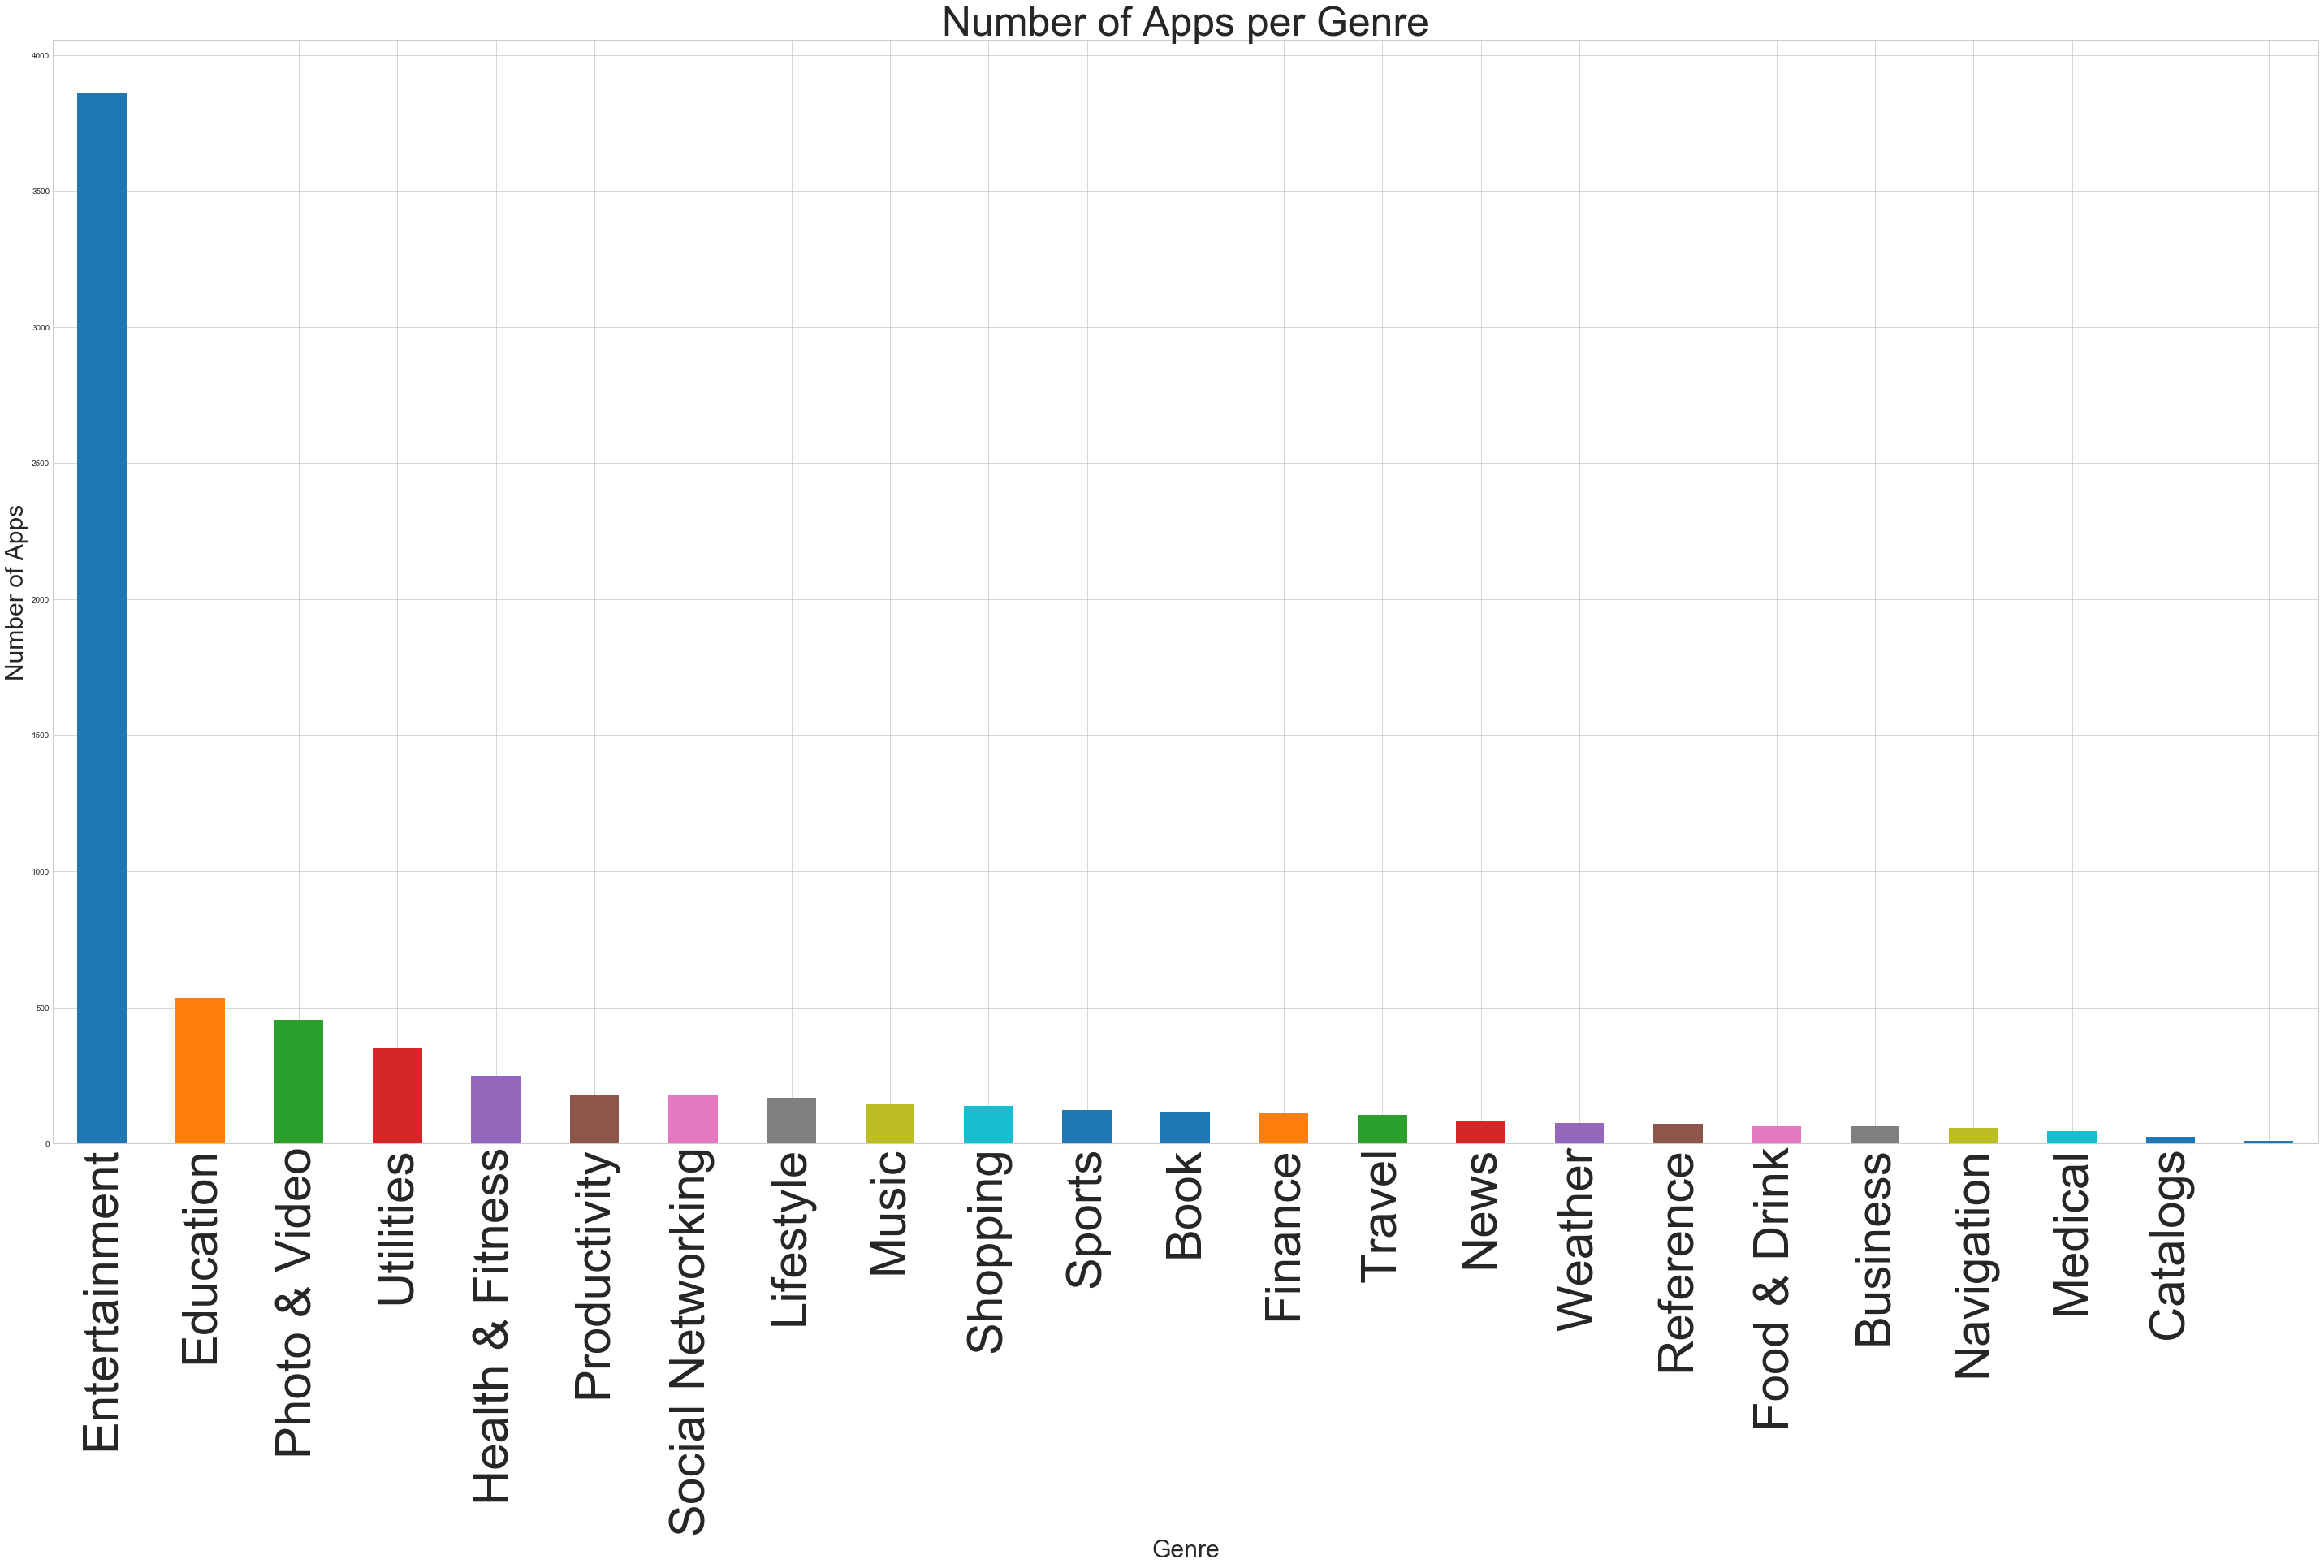

In [157]:
#  To be used with 'prime_genre' as pd.dummies
heatmapDataset = pd.concat([nonGamesDataSet, pd.get_dummies(nonGamesDataSet['prime_genre'], prefix_sep="genre", dummy_na=False)], axis = 1)
plt.figure(figsize=(50, 25));
plt.title('Number of Apps per Genre', fontsize=50)
plt.xlabel('Genre', fontsize=30)
plt.ylabel('Number of Apps', fontsize=30)
g = dataSet['prime_genre'].value_counts().plot(kind='bar');
g.set_xticklabels(labels=nonGamesDataSet['prime_genre'].value_counts().index, fontsize=60);

In [158]:
#  Looking at most popular Apps
nonGamesDataSet[nonGamesDataSet['rating_count_tot']==nonGamesDataSet['rating_count_tot'].max()]

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,ver,id,track_name,cont_rating,prime_genre
16,0.096709,0.0,1.0,0.001197,0.7,0.7,0.736842,0.2,0.386667,95.0,284882215,Facebook,4+,Social Networking


### Poplarity by User Rating

In [159]:
popularGenre = nonGamesDataSet.groupby(['prime_genre'])['user_rating'].agg({'user_rating':sum})

# reset the Dataframe index
popularGenre.reset_index(inplace=True) 
popularGenre.sort_values(by='user_rating', ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,prime_genre,user_rating
4,Entertainment,347.4
3,Education,305.9
13,Photo & Video,265.3
20,Utilities,162.6
14,Productivity,142.6
7,Health & Fitness,133.2
10,Music,109.8
17,Social Networking,99.7
16,Shopping,86.4
8,Lifestyle,80.8


### Popularity by Rating counts

In [160]:
popularGenre = nonGamesDataSet.groupby(['prime_genre'])['rating_count_tot'].agg({'rating_count_tot':sum})

# reset the Dataframe index
popularGenre.reset_index(inplace=True) 
popularGenre.sort_values(by='rating_count_tot', ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,prime_genre,rating_count_tot
17,Social Networking,2.554334
13,Photo & Video,1.683863
4,Entertainment,1.354944
10,Music,1.338028
16,Shopping,0.763468
7,Health & Fitness,0.599854
20,Utilities,0.572240
18,Sports,0.537561
21,Weather,0.536877
15,Reference,0.482168


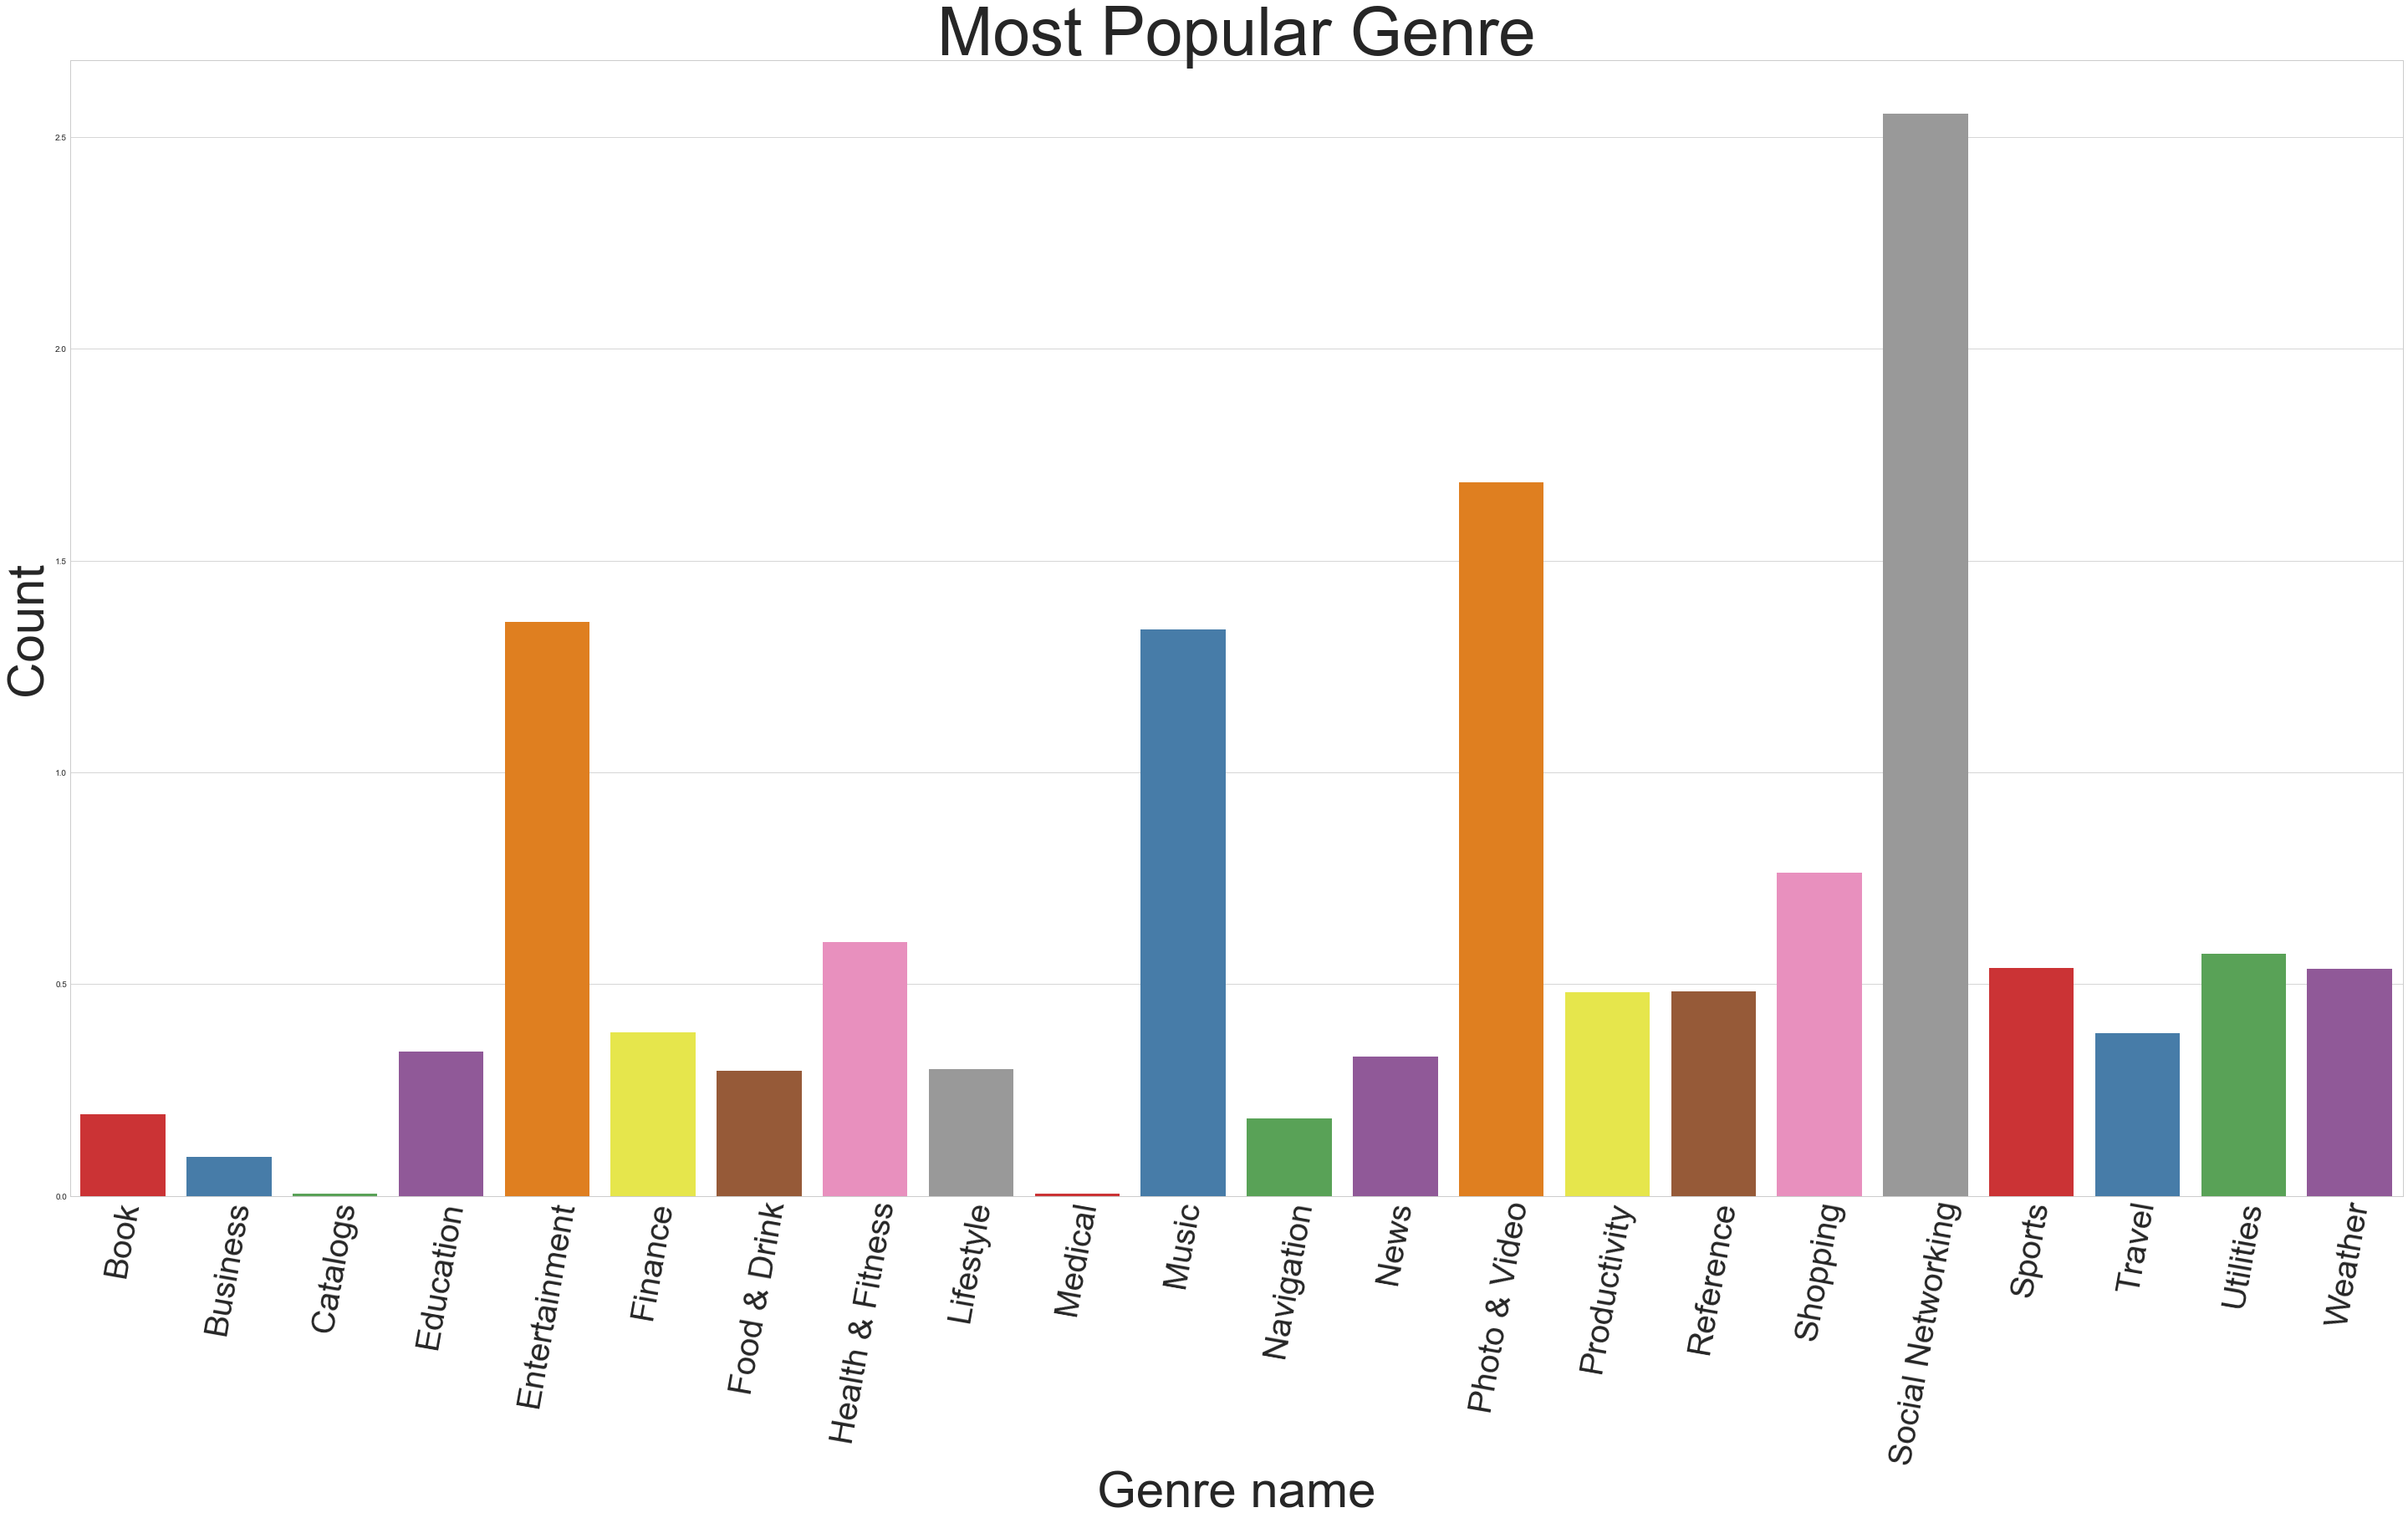

In [161]:
plt.figure(figsize=(50, 25));
g = sns.barplot(x = 'prime_genre', y='rating_count_tot', data=popularGenre, palette="Set1")
g.set_xticklabels(rotation=80, labels=popularGenre['prime_genre'], fontsize=40)
plt.title('Most Popular Genre', fontsize=80)
plt.xlabel('Genre name', fontsize=60)
plt.ylabel('Count', fontsize=60);

In [167]:
#  TODO check why there are so many NAN'suser_rating
# nonGamesDataSet = dataSet[dataSet['prime_genre'] != 'Games']
# nonGamesDataSet.head()
popularApp = nonGamesDataSet.drop(['id','size_bytes','ver', 'price','rating_count_ver','user_rating_ver','rating_count_tot', 'cont_rating','sup_devices.num','ipadSc_urls.num','lang.num'], axis=1)
popularApp['track_name'].groupby(popularApp['prime_genre'])
popularApp
# popularApp.loc[popularApp.groupby(['prime_genre'])['user_rating'].idxmax()]
# nonGamesDataSet.iloc[nonGamesDataSet['user_rating'].argmax()]
# popularApp
# .idxmax()
# nonGamesDataSet.head()
# popularApp = nonGamesDataSet.loc[nonGamesDataSet.reset_index().groupby(['prime_genre'])['user_rating'].idxmax()]
# popularApp
# # reset the Dataframe index
# popularGenre.reset_index(inplace=True) 
# popularApp.drop(['id','size_bytes','rating_count_ver','user_rating_ver','rating_count_tot', 'cont_rating','sup_devices.num','ipadSc_urls.num','lang.num'], axis=1, inplace=True)
# popularApp.set_index('prime_genre', inplace=True)
# popularApp

,user_rating,track_name,prime_genre
1,0.8,Evernote - stay organized,Productivity
2,0.7,"WeatherBug - Local Weather, Radar, Maps, Alerts",Weather
3,0.8,"eBay: Best App to Buy, Sell, Save! Online Shopping",Shopping
4,0.9,Bible,Reference
6,0.8,PayPal - Send and request money safely,Finance
7,0.8,Pandora - Music & Radio,Music
8,0.9,PCalc - The Best Calculator,Utilities
12,0.7,Google – Search made just for mobile,Utilities
13,0.7,Bank of America - Mobile Banking,Finance
15,0.8,TripAdvisor Hotels Flights Restaurants,Travel


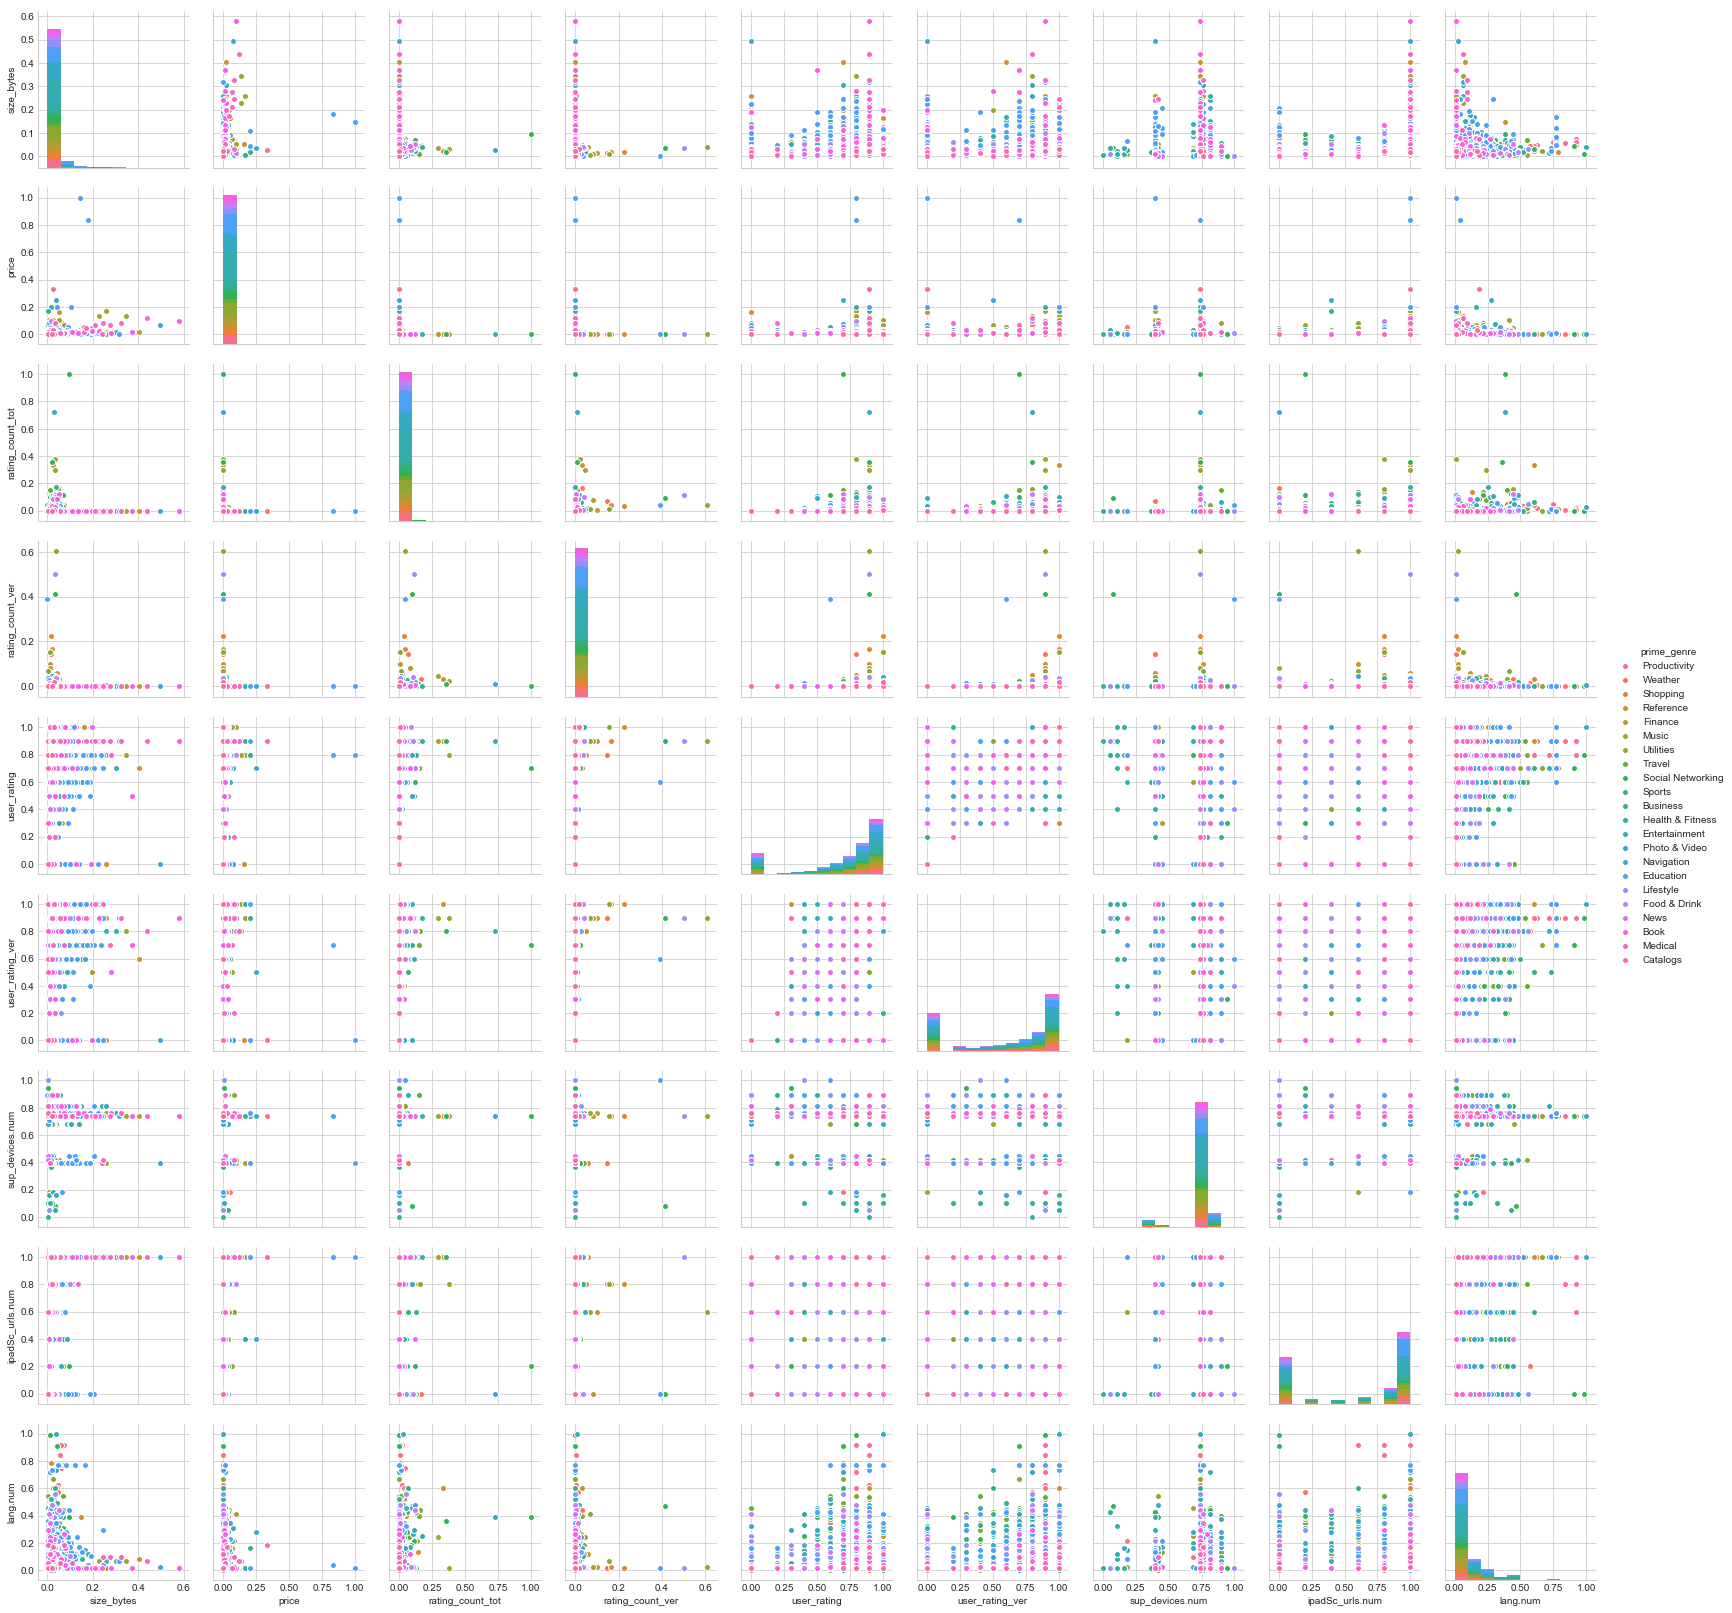

In [43]:
sns.pairplot(nonGamesDataSet.drop(labels=['id', 'ver', 'track_name'], axis=1), hue="prime_genre")

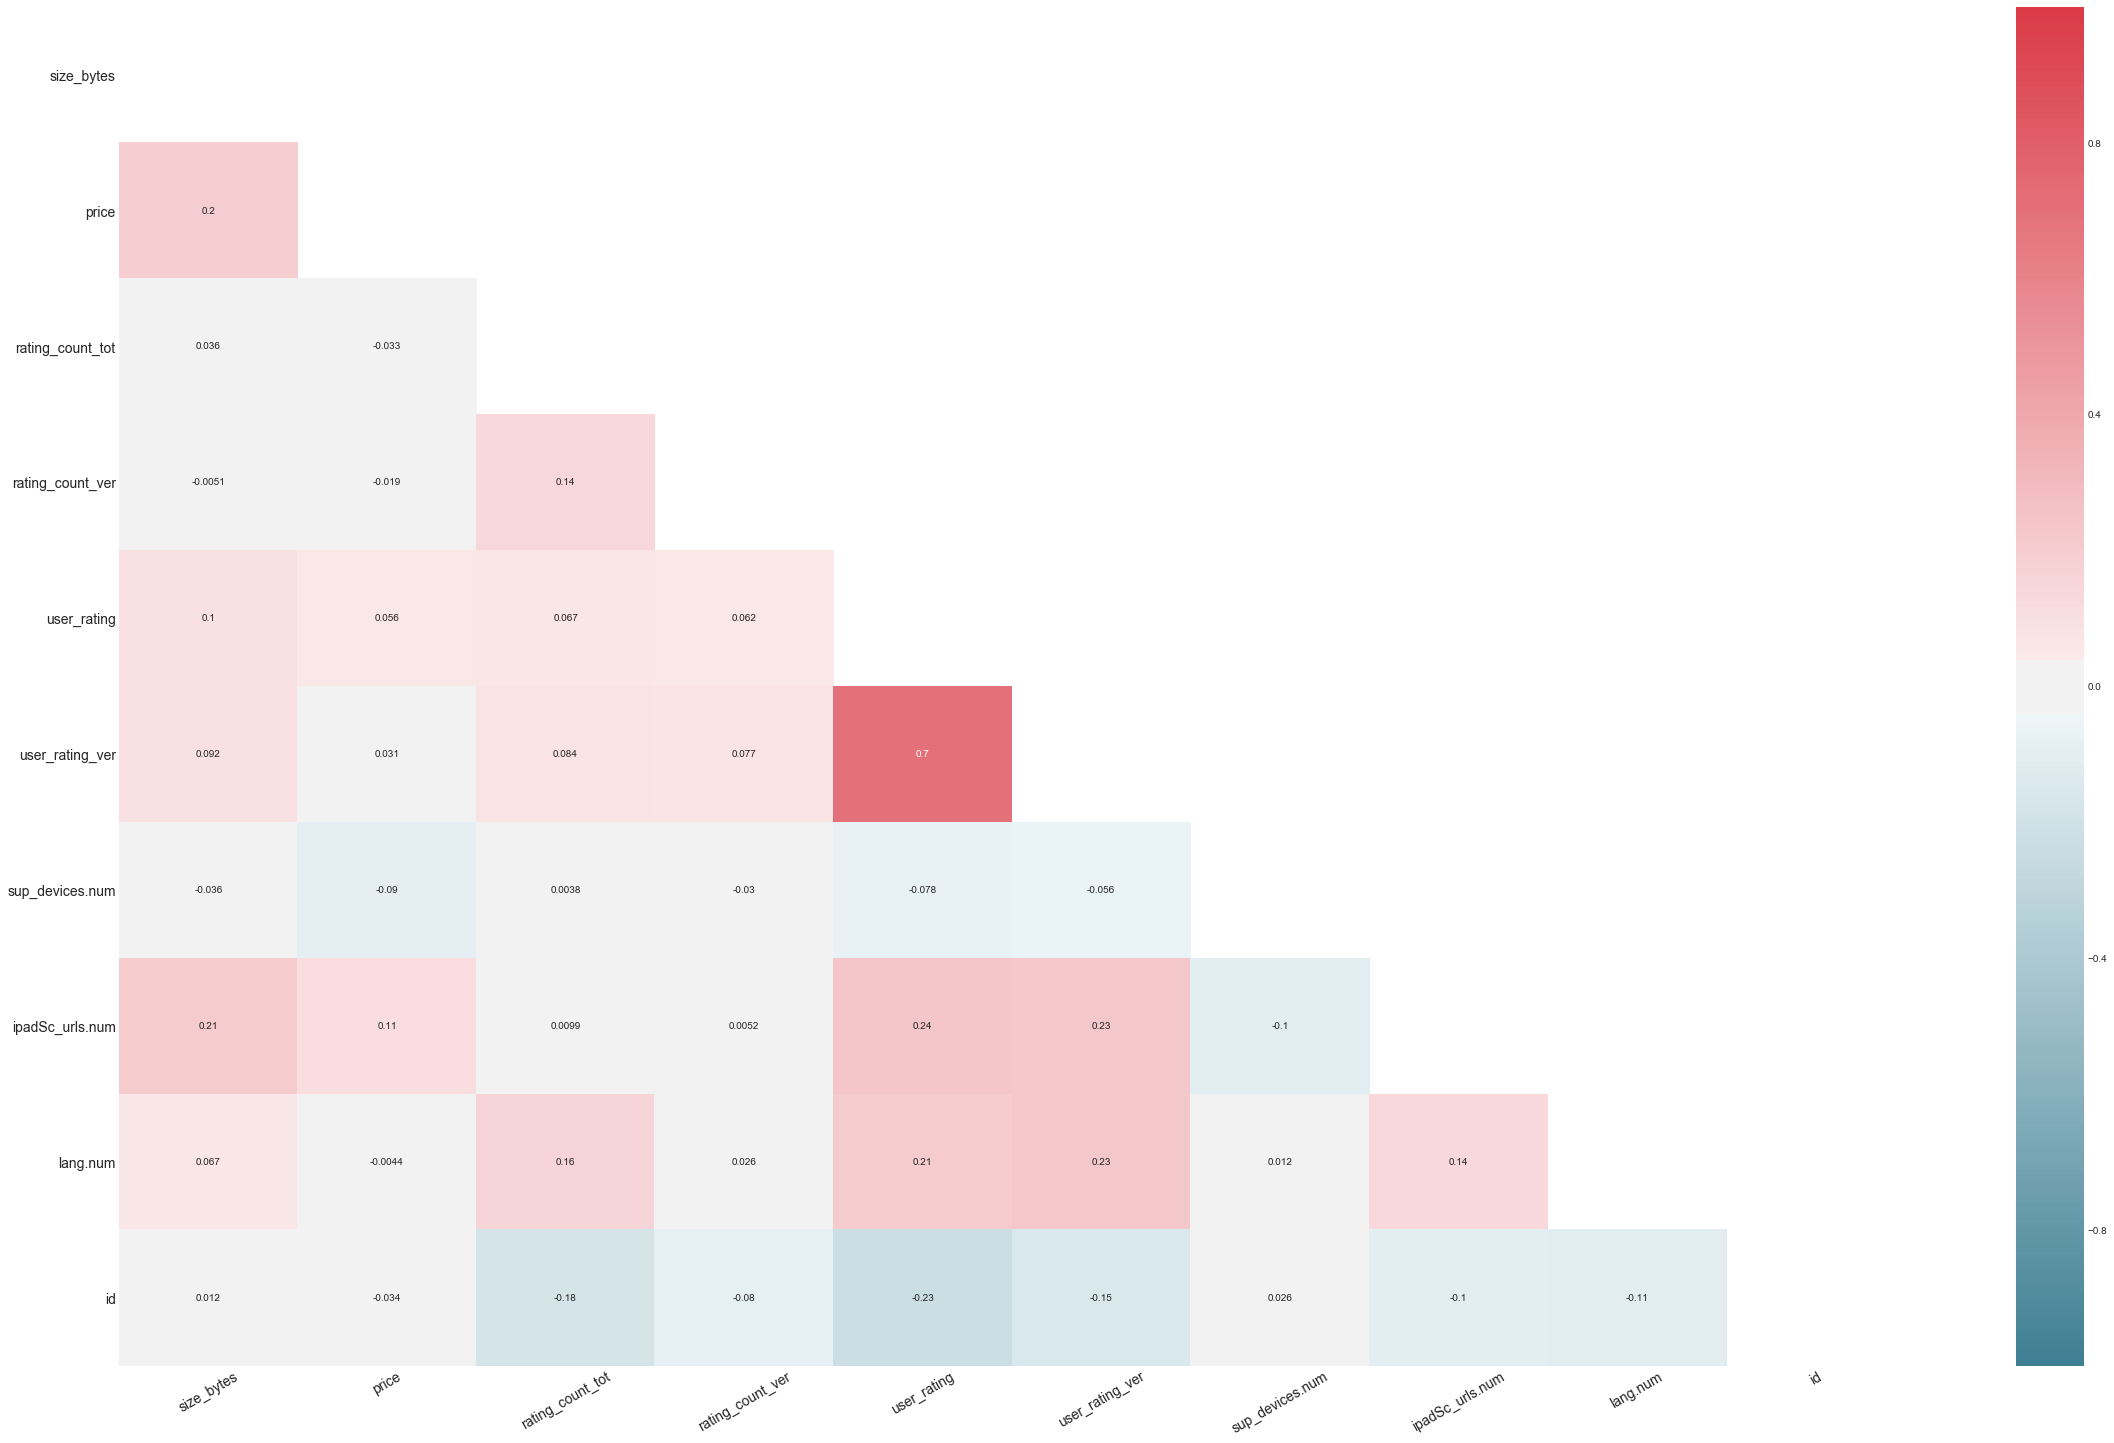

In [143]:
def correlation_heat_map(df):
   corrs = df.corr()

   # Set the default matplotlib figure size:
   fig, ax = plt.subplots(figsize=(40,25))

   # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
   mask = np.zeros_like(corrs, dtype=np.bool)
   mask[np.triu_indices_from(mask)] = True

   # Plot the heatmap with Seaborn.
   # Assign the matplotlib axis the function returns. This allow us to resize the labels.
   cmap = sns.diverging_palette(220, 10, as_cmap=True)
   ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

   # Resize the labels.
   ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
   ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

   # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
   plt.show()

correlation_heat_map(numericDataSet);

No handles with labels found to put in legend.


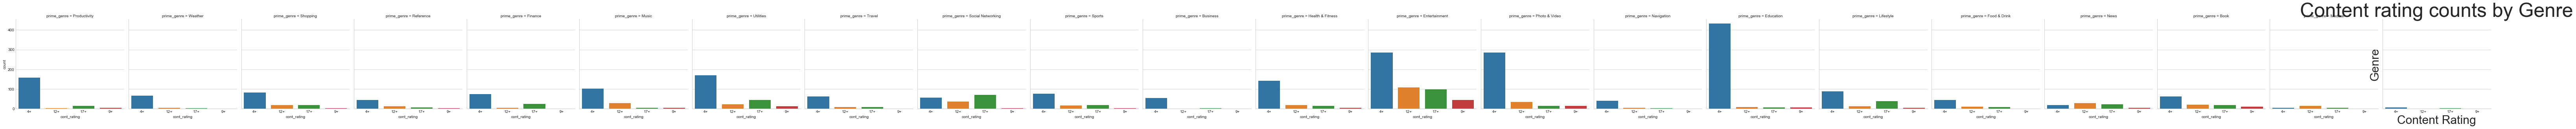

In [144]:
#  Plot the Prime Genres and the content rating for each

plt.figure(figsize=(10, 8));
b = sns.factorplot('cont_rating', col='prime_genre', data=nonGamesDataSet,  
               kind="count");
plt.title('Content rating counts by Genre', fontsize=50)
plt.xlabel('Content Rating', fontsize=30)
plt.ylabel('Genre', fontsize=30)
plt.legend();

In [145]:
#  TO DO convert the User rating into range
# Plot the Prime Genres and the user rating for current version for each

# plt.figure(figsize=(10, 8));
# sns.factorplot('user_rating_ver', col='prime_genre', data=nonGamesDataSet,  
#                kind="count", legend=True);
# plt.title('Plot of Prime Genres and the user rating for current version for each genre');

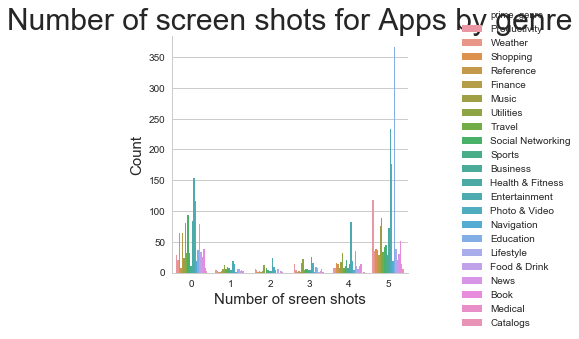

In [178]:
#  TO DO convert rating count into range

# Plot the Prime Genres and the rating count total for each

plt.figure(figsize=(100, 75));
sns.factorplot('ipadSc_urls.num', data=nonGamesDataSet,  
               kind="count", hue='prime_genre', legend=True);
plt.title('Number of screen shots for Apps by genre', fontsize=30)
plt.xlabel('Number of sreen shots', fontsize=15)
plt.ylabel('Count', fontsize=15);

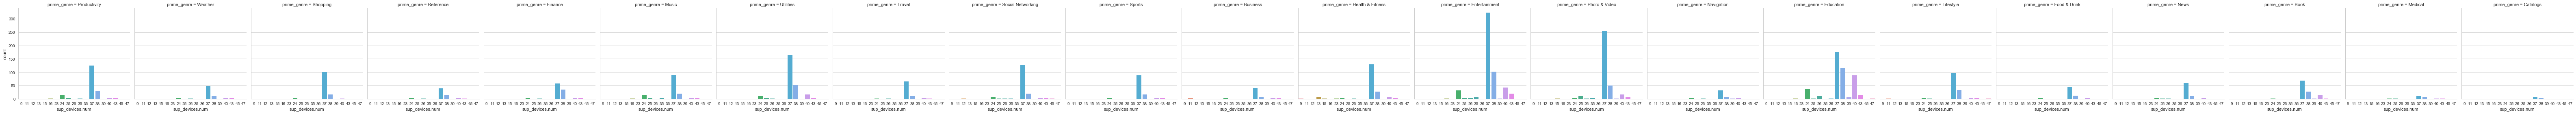

In [177]:
#  TO DO convert the num of supporting devices into range
# # Plot the Prime Genres and the number of supporting devices 

plt.figure(figsize=(10, 8));
sns.factorplot('sup_devices.num', col='prime_genre', data=nonGamesDataSet,  
               kind="count", legend=True);

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


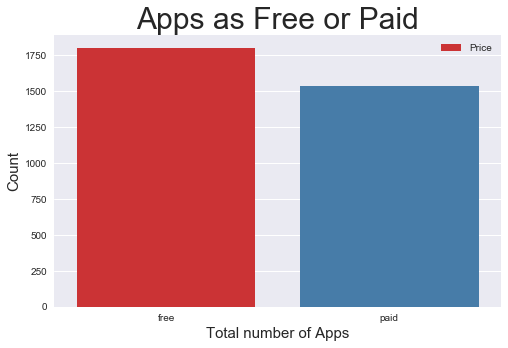

In [148]:
nonGamesDataSet['Free_Paid'] = ['free' if each == 0.0 else 'paid' for each in nonGamesDataSet['price']]

b = sns.set(rc={'figure.figsize':(8, 5)})
ax = sns.countplot(x='Free_Paid', data=nonGamesDataSet, palette='Set1')
plt.title('Apps as Free or Paid', fontsize=30)
plt.xlabel('Total number of Apps', fontsize=15)
plt.ylabel('Count', fontsize=15);
ax.legend(["Price"])

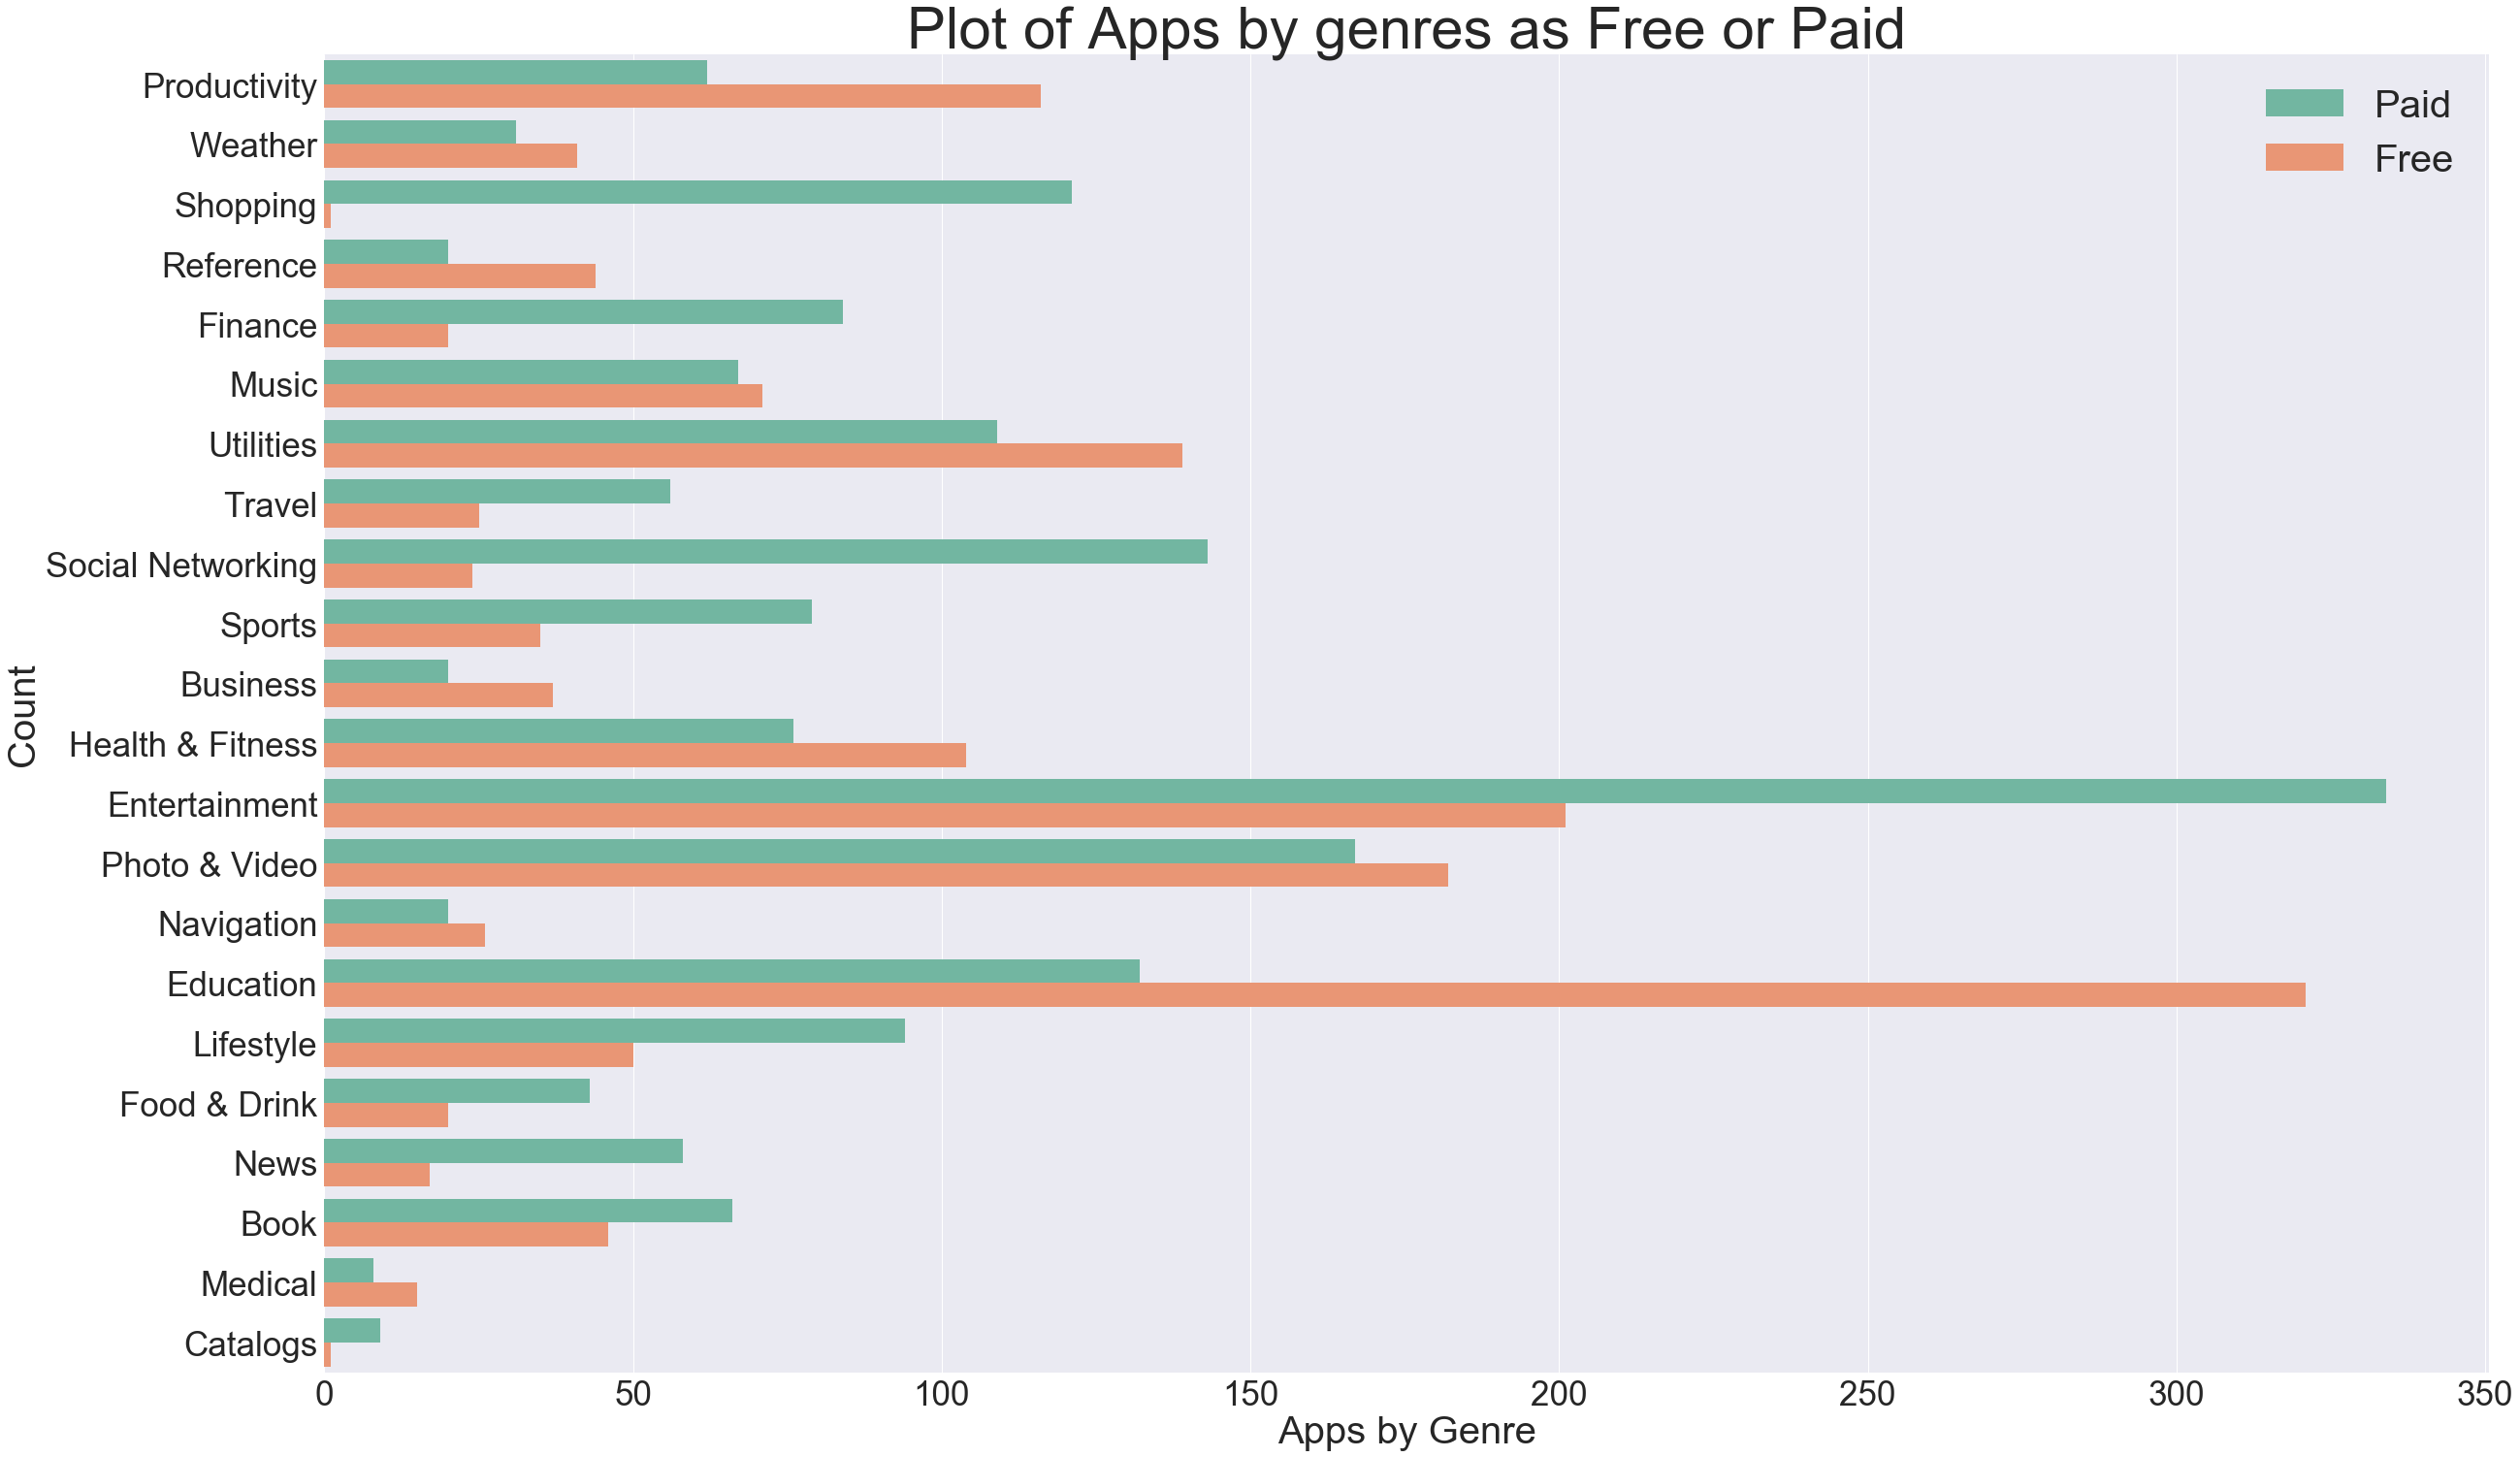

In [149]:
sns.set(rc={'figure.figsize':(40, 25)})
b = sns.countplot(y="prime_genre", hue='Free_Paid', data=nonGamesDataSet, palette="Set2")
plt.title('Plot of Apps by genres as Free or Paid', fontsize=60)
plt.xlabel('Apps by Genre',fontsize=40)
plt.ylabel('Count', fontsize=40);
b.tick_params(labelsize=35)
b.legend(["Paid", "Free"],fontsize=40 )
# dataSet['prime_genre'].value_counts().plot(kind='bar');

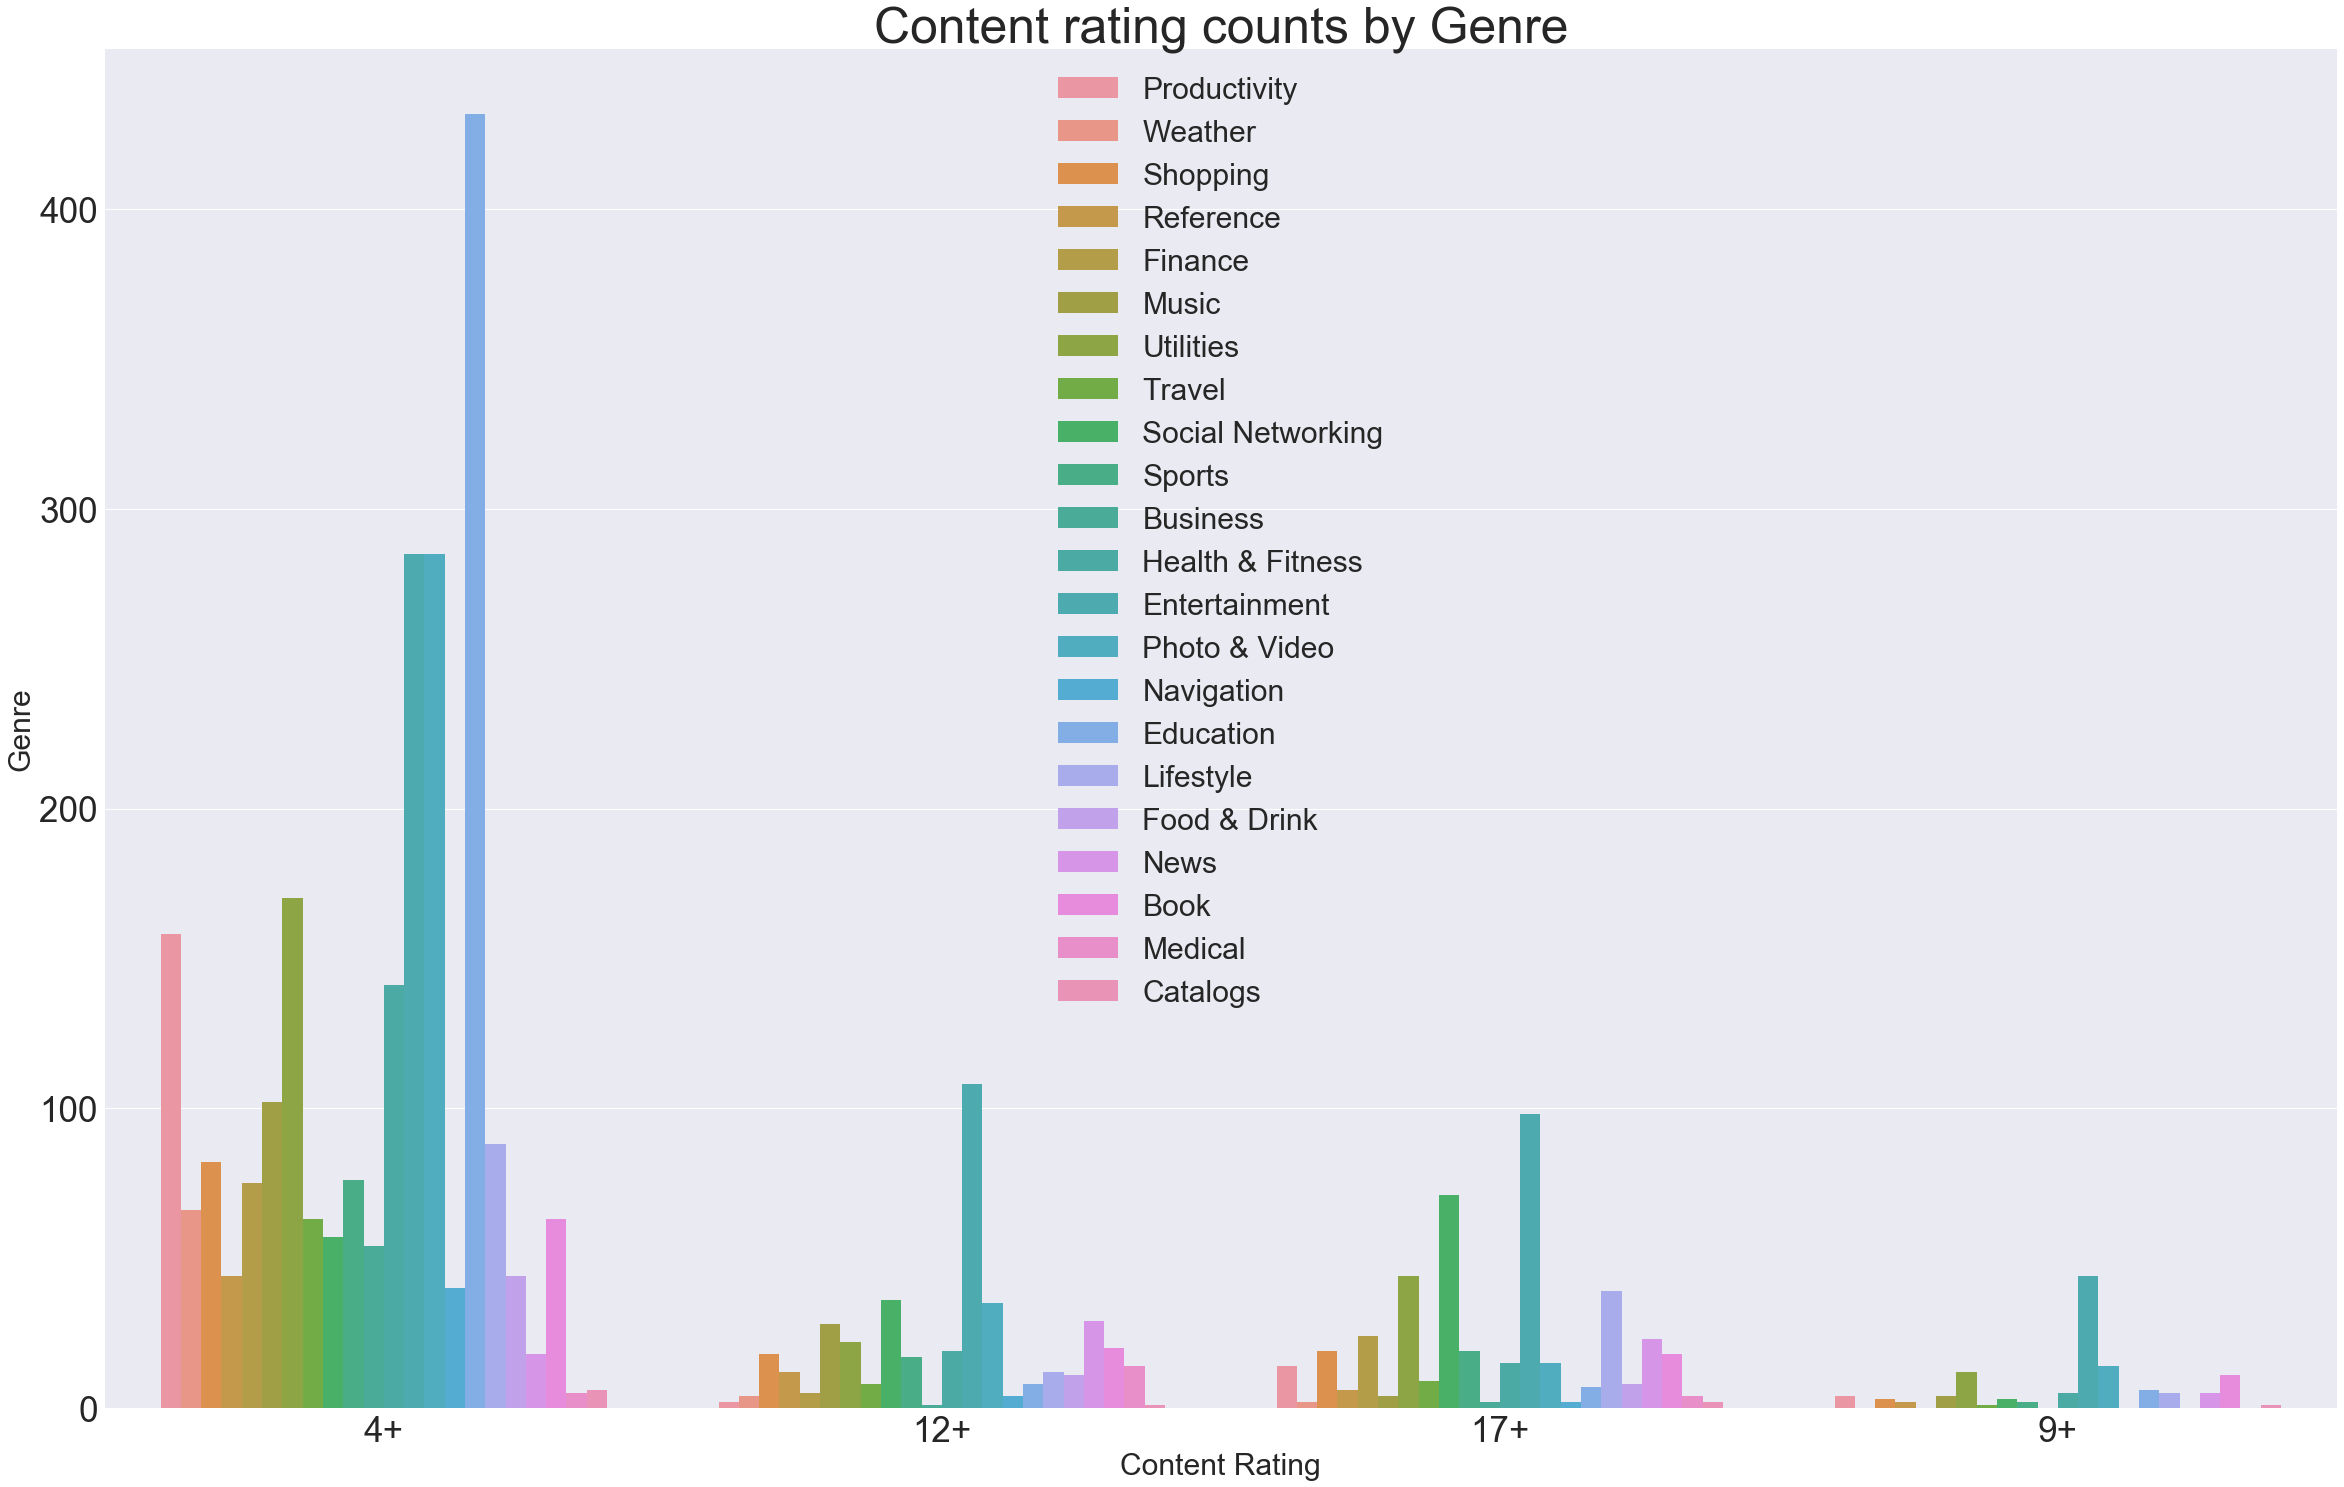

In [150]:
b =sns.countplot(x='cont_rating', hue='prime_genre', data=nonGamesDataSet)
plt.title('Content rating counts by Genre', fontsize=50)
plt.xlabel('Content Rating', fontsize=30)
plt.ylabel('Genre', fontsize=30);
b.tick_params(labelsize=35)
plt.legend(fontsize=30);

In [151]:
#  TO DO convert the User rating into range
# ax.set(xlim=(10, 80))

# #  Plot user rating and user rating for current version for all genres
# sns.factorplot('user_rating', data=nonGamesDataSet,  
#                kind="count",hue = 'prime_genre');
# plt.title('User rating counts by Genre', fontsize=10)
# plt.xlabel('User Rating', fontsize=5)
# plt.ylabel('Count', fontsize=5);
# # plt.legend(fontsize=5);

In [152]:
#  TO DO convert the User rating ver into range

# sns.factorplot('user_rating_ver', data=nonGamesDataSet,  
#                kind="count",hue = 'prime_genre', legend=True)
# plt.title("User rating for the App's current version by Genre")
# plt.xlabel('User Rating for current version')
# plt.ylabel('Count');